<a href="https://colab.research.google.com/github/salmatkamal/historicalminwage/blob/master/Copy_of_ECO2460_Paper_Extension_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECO2460: Paper Replication & Extension**

**"Seeing Beyond the Trees: Using Machine Learning to Estimate the Impact of Minimum Wages on Labour Market Outcomes - A Replication and Extension study"**

Code and Output File: Extension

* Salma Ahmed (#1008511610)
salm.ahmed@mail.utoronto.ca

* Maria Sedhom (#1004520191)
m.sedhom@mail.utoronto.ca

* Shannon Smith (#1008615893) 
shannonr.smith@mail.utoronto.ca

# **Preamble**
This file provides the code and output used for the extension analysis.

**Sources**
This file is influenced by a variety of online sources and Youtube tutorials. I cited all Specifically, the code is adapted from the following blogs/channels:

*   Abdullah Al Imran, 2019. https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
*   Ryan Reilly, 2021. https://ryan-reilly.medium.com/gridsearch-pipelines-of-multiple-models-on-multiclass-classification-e9124b6ea2e3
* https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

#**Data Cleaning**

In [ ]:
!pip install tabulate

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tabulate import tabulate

In [73]:
from google.colab import drive #Linking to my google drive, sine I am coding this on Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
def is_data(year, region, f):
  curr_minwage = f[year][region]

  # check the last 20 quarters
  for i in range(5):
    check_year = year - 1 - i
    if check_year in f and f[check_year][region] != curr_minwage:
      return False
  
  # check next 12 quarters
  for j in range(3):
    check_year = year + 1 + j
    if check_year in f and f[check_year][region] != curr_minwage:
      return True
    
  return False


df = pd.read_csv('/content/drive/My Drive/Masters/ECO2460/ECO2460 - Draft Paper/census_nomissing_state.csv')    # import dataset
df.head

f = {}

# First we extract the years and store the corresponding minimum wage for each state
# Note: This assumes that the minwage is the same for each region-year instance
#     E.g. - Every observation with region 31 will have minwage=3 in the year 1990



# https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/
for ind in df.index:
     year, region, minwage = df['year'][ind], df['region'][ind], df['minwage'][ind]
     if year in f:
       if not region in f[year]:
         f[year][region] = minwage
     else:
       f[year] = {region:minwage}


# Now we'll go through the observations again and using our new dictionary f, we
# will place each observation in the full_dataset if appropriate
full_dataset = []
for index, row in df.iterrows():
  year, region = row['year'], row['region']
  if is_data(year, region, f):
    full_dataset.append(row) # I stored the observation as the whole row, change it to whatever you like (you could store it as a dict even)

import random
random.shuffle(full_dataset)

#print(df.iloc[1, :])

#print("full_dataset:", len(full_dataset), full_dataset[0])

split = int(len(full_dataset) * (150000 / 469174))

#print(split)

train_set = full_dataset[:split]
test_set = full_dataset[split:]

#print("train_set:", len(train_set), train_set[0])
#print("test_set:", len(test_set), test_set[0])

In [76]:
df_raw = pd.DataFrame(full_dataset)
df = df_raw.reset_index()
df = df.dropna()
print(df.isnull().sum())
df.head()

index             0
v1                0
year              0
statefip          0
region            0
age               0
minwage           0
hourwage_final    0
gender            0
educ2             0
hispanic          0
race              0
marital           0
veteran           0
mw_indicator      0
rural3            0
dtype: int64


,index,v1,year,statefip,region,age,minwage,hourwage_final,gender,educ2,hispanic,race,marital,veteran,mw_indicator,rural3
0,310469,3980029.0,2004.0,36.0,12.0,20.0,5.0,7.500000,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0
1,233466,3283184.0,1989.0,26.0,21.0,55.0,3.0,10.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0
2,127165,1605223.0,2005.0,34.0,12.0,39.0,5.0,30.868422,0.0,4.0,0.0,1.0,1.0,0.0,0.0,3.0
3,378417,4828117.0,2019.0,39.0,21.0,24.0,9.0,15.000000,1.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0
4,430341,6450368.0,1992.0,6.0,42.0,34.0,4.0,11.250000,1.0,4.0,0.0,1.0,0.0,0.0,0.0,3.0


In [77]:
df['race'] = df['race'].astype('category') # converting dtype to 'float'
df['mw_indicator'] = df['mw_indicator'].astype('category')
df['veteran'] = df['veteran'].astype('category')
df['marital'] = df['marital'].astype('category')
df['rural3'] = df['rural3'].astype('category')
df['gender'] = df['gender'].astype('category')
df['hispanic'] = df['hispanic'].astype('category')
df['educ2'] = df['educ2'].astype('category')
df.drop(columns= df[df.columns[0:2]], inplace = True) #drop person ID and count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93711 entries, 0 to 94420
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            93711 non-null  float64 
 1   statefip        93711 non-null  float64 
 2   region          93711 non-null  float64 
 3   age             93711 non-null  float64 
 4   minwage         93711 non-null  float64 
 5   hourwage_final  93711 non-null  float64 
 6   gender          93711 non-null  category
 7   educ2           93711 non-null  category
 8   hispanic        93711 non-null  category
 9   race            93711 non-null  category
 10  marital         93711 non-null  category
 11  veteran         93711 non-null  category
 12  mw_indicator    93711 non-null  category
 13  rural3          93711 non-null  category
dtypes: category(8), float64(6)
memory usage: 5.7 MB


In [78]:
df.rename(columns={ df.columns[0]: "ID" }, inplace = True)
df.head()

,ID,statefip,region,age,minwage,hourwage_final,gender,educ2,hispanic,race,marital,veteran,mw_indicator,rural3
0,2004.0,36.0,12.0,20.0,5.0,7.500000,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1989.0,26.0,21.0,55.0,3.0,10.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0
2,2005.0,34.0,12.0,39.0,5.0,30.868422,0.0,4.0,0.0,1.0,1.0,0.0,0.0,3.0
3,2019.0,39.0,21.0,24.0,9.0,15.000000,1.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0
4,1992.0,6.0,42.0,34.0,4.0,11.250000,1.0,4.0,0.0,1.0,0.0,0.0,0.0,3.0


* **Splitting train and test data**

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop(['mw_indicator'], axis=1)
y = df[["mw_indicator"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [31]:
train.shape

(65597, 13)

# **Classifiers with default values**

In [81]:
# Pipeline, Gridsearch, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Plot the confusion matrix at the end of the tutorial
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Classification Models
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# fix random seed for reproducibility
random_state = np.random.seed(5)

* **Default values of ANN, KNN, SVM**

In [82]:
#making a list of classifiers
classifiers = [KNeighborsClassifier(),
               svm.SVC(kernel= 'linear', random_state=random_state, probability=True),
               MLPClassifier()]

#making a results table to store the accuracy values
results_table = pd.DataFrame(columns=['classifiers', 'FPR','TPR','AUC', 'precision', 'recall', 'f1', 
                                      'avgprecision', 'avgrecall', 'test_mse', 'train_mse'])

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    test_mse = mean_squared_error(y_test,yproba)
    xproba = model.predict(X_train)
    train_mse = mean_squared_error(y_train,xproba)
    avgprecision = average_precision_score(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    precision, recall, threshold = precision_recall_curve(y_test,  yproba)
    results_table = results_table.append({'classifiers':cls.__class__.__name__,
                                        'FPR':fpr, 
                                        'TPR':tpr, 
                                        'AUC':auc,
                                        'precision': precision, 
                                        'recall': recall, 
                                        'f1': f1, 
                                        'test_mse': test_mse, 
                                        'train_mse': train_mse}, ignore_index=True)

#making the table look (somewhat) pretty
results_table.set_index('classifiers', inplace=True)
results_table.rename({'KNeighborsClassifier': 'K-Nearest Neighbor',
                      'svm.SVC': 'Support Vector Machine',
                      'MLPClassifier': 'Artificial Neural Networks'}, inplace=True)

Default_Accuracy = print(results_table)
Default_Accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                          FPR  \
classifiers                                                                     
K-Nearest Neighbor          [0.0, 0.0007078810759792355, 0.003971999370772...   
SVC                         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Artificial Neural Networks  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                                          TPR  \
classifiers                                                                     
K-Nearest Neighbor          [0.0, 0.33581533879374537, 0.5197319434102755,...   
SVC                         [0.0, 0.6876396128071481, 0.7498138495904692, ...   
Artificial Neural Networks  [0.0, 0.03164556962025317, 0.03313477289650037...   

                                 AUC  \
classifiers                            
K-Nearest Neighbor          0.963536   
SVC                         0.999821   
Artificial Neural Networks  

*Plotting ROC/AUC curve*

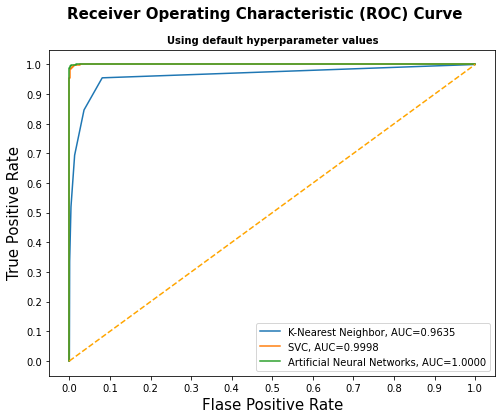

In [83]:
figure = plt.figure(figsize=(8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['FPR'], 
             results_table.loc[i]['TPR'], 
             label="{}, AUC={:.4f}".format(i, results_table.loc[i]['AUC']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.suptitle('Receiver Operating Characteristic (ROC) Curve', fontweight='bold', fontsize=15)
plt.title('Using default hyperparameter values', fontweight='bold', fontsize=10)
plt.legend(prop={'size':10}, loc='lower right')

plt.show() #beautiful graph!

*Plotting Precision Recall Curve*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

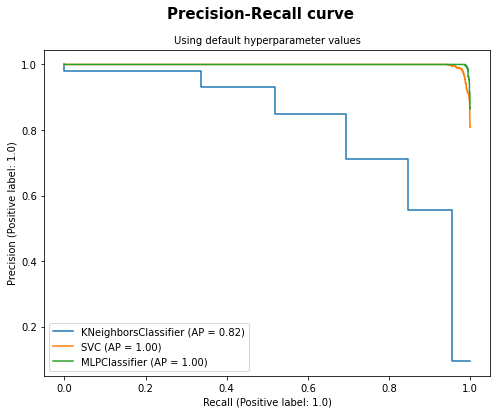

In [84]:
from sklearn.metrics import plot_precision_recall_curve

figure = plt.figure(figsize=(8,6))

for cls in classifiers:
  plot_precision_recall_curve(cls, X_test, y_test, ax = plt.gca(), name = cls.__class__.__name__)

plt.suptitle('Precision-Recall curve',  fontweight='bold', fontsize=15)
plt.title('Using default hyperparameter values', fontsize=10)
plt.legend(prop={'size':10}, loc='lower left')

# **Tuning Hyperparameters**
Given that this process was very time consuming (upwards of 6 hours), the tuned hyperparameters were obtained from several runs of this notebook.

In [ ]:
from sklearn.neural_network import MLPClassifier
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_ann = Pipeline([('scl', StandardScaler()),
                     ('ANN', MLPClassifier(random_state=random_state, max_iter=300))])
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('SVM', svm.SVC(random_state=random_state))])

In [ ]:
#parameter grids
layers = [(500, 400, 300, 100), (400, 400, 400, 100), (300, 200, 300, 100)]
alpha = [0.0001, 0.001]
activation = ['tanh', 'relu']

knn_param_grid = [{'KNN__n_neighbors': [1, 2, 3, 4, 5],
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean','manhattan']}]

ann_param_grid = [{'ANN__hidden_layer_sizes': layers, 
                   'ANN__alpha': alpha, 
                   'ANN__activation': activation}]

svm_param_grid = [{'SVM__C': [1,2,3,4,5], 
                   'SVM__kernel': ['linear','rbf', 'sigmoid']}]

knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='f1_micro', 
        verbose = 1,
        cv=3)
  
ann_grid_search = GridSearchCV(estimator=pipe_ann,
        param_grid=ann_param_grid,
        scoring='average_precision',
        verbose = 1,
        cv=3)

svm_grid_search = GridSearchCV(estimator=pipe_ann,
        param_grid=svm_param_grid,
        scoring='average_precision',
        verbose = 1,
        cv=3)

In [ ]:
#grid search (this took 6 hours)
grids = [knn_grid_search, ann_grid_search, svm_param_grid]
for pipe in grids:
    pipe.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

AttributeError: ignored

In [ ]:
#best parameters
grid_dict = {0:'K-Nearest Neighbors', 1:'Artificial Neural Networks', 2: 'Naive Bayes'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))
    print('{} Thresholds: {}'.format(grid_dict[i], model.predict(X_test)))


K-Nearest Neighbors Test Accuracy: 0.9117877214199331
K-Nearest Neighbors Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}
K-Nearest Neighbors Thresholds: [0. 0. 0. ... 0. 0. 0.]
Artificial Neural Networks Test Accuracy: 0.9983205445627432
Artificial Neural Networks Best Params: {'ANN__activation': 'tanh', 'ANN__alpha': 0.001, 'ANN__hidden_layer_sizes': (300, 200, 300, 100)}
Artificial Neural Networks Thresholds: [0. 0. 0. ... 0. 0. 0.]


AttributeError: ignored


* **From run 2**: K-Nearest Neighbors Test Accuracy: 0.9117877214199331
K-Nearest Neighbors Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}
K-Nearest Neighbors Thresholds: [0. 0. 0. ... 0. 0. 0.]
Artificial Neural Networks Test Accuracy: 0.9983205445627432
Artificial Neural Networks Best Params: {'ANN__activation': 'tanh', 'ANN__alpha': 0.001, 'ANN__hidden_layer_sizes': (300, 200, 300, 100)}

* **From run 1**: Best parameters: K-Nearest Neighbors Test Accuracy: 0.9489805785523546
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
Support Vector Machines Test Accuracy: 0.9983115018707369
Support Vector Machines Best Params: {'SVM__C': 1, 'SVM__kernel': 'linear'}*

# **Classifiers with tuned hyperparameters**

In [85]:
from sklearn import svm
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean', weights = 'distance')
svm = svm.SVC(kernel = 'linear', C= 1, random_state=random_state, probability=True)
ann = MLPClassifier(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (300, 200, 300, 100), max_iter = 300)


* **Tuned values of ANN, KNN, SVM**

In [86]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

classifiers = [knn,
               svm,
               ann]

#making a results table to store the accuracy values
results_table2 = pd.DataFrame(columns=['classifiers', 'Precision','Recall', 'F1', 'Threshold', 'FPR', 'TPR', 'AUC', 'Train MSE', 'Test MSE'])

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict(X_test)
    test_mse = mean_squared_error(y_test,yproba)
    xproba = model.predict(X_train)
    train_mse = mean_squared_error(y_train,xproba)
    precision, recall, threshold = precision_recall_curve(y_test,  yproba)
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    f1 = f1_score(y_test, yproba, average = "micro")
    results_table2 = results_table2.append({'classifiers':cls.__class__.__name__,
                                        'Precision': precision, 
                                        'Recall': recall,
                                        'F1': f1,
                                        'Threshold': threshold,
                                        'FPR': fpr,
                                        'TPR': tpr,
                                        'avgpr': avgprecision,
                                        'avgrecall': avgrecall,
                                        'Train MSE': train_mse,
                                         'Test MSE': test_mse,
                                        'AUC': auc}, ignore_index=True)

#making the table look (somewhat) pretty
results_table2.set_index('classifiers', inplace=True)
results_table2.rename({'pipe_knn': 'K-Nearest Neighbor',
                      'pipe_svm': 'Support Vector Machine',
                       'pipe_ann': 'Neural Networks'})

PrecisionRecall = print(results_table2)
PrecisionRecall

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                           Precision  \
classifiers                                                            
KNeighborsClassifier  [0.09553958881695952, 0.8497316636851521, 1.0]   
SVC                   [0.09553958881695952, 0.9828358208955223, 1.0]   
MLPClassifier                             [0.09553958881695952, 1.0]   

                                              Recall        F1   Threshold  \
classifiers                                                                  
KNeighborsClassifier  [1.0, 0.7073715562174236, 0.0]  0.960091  [0.0, 1.0]   
SVC                   [1.0, 0.9806403574087863, 0.0]  0.996514  [0.0, 1.0]   
MLPClassifier                             [1.0, 0.0]  0.904460       [0.0]   

                                                    FPR  \
classifiers                                               
KNeighborsClassifier   [0.0, 0.013213780084945729, 1.0]   
SVC                   [0.0, 0.0018090294163913797, 1.0]   
MLPClassifie

*Plotting ROC curve*

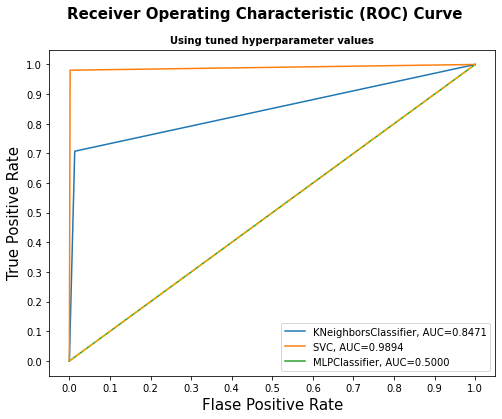

In [88]:
figure = plt.figure(figsize=(8,6))

for i in results_table2.index:
    plt.plot(results_table2.loc[i]['FPR'], 
             results_table2.loc[i]['TPR'], 
             label="{}, AUC={:.4f}".format(i, results_table2.loc[i]['AUC']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.suptitle('Receiver Operating Characteristic (ROC) Curve', fontweight='bold', fontsize=15)
plt.title('Using tuned hyperparameter values', fontweight='bold', fontsize=10)
plt.legend(prop={'size':10}, loc='lower right')

plt.show() #beautiful graph!

*Plotting Precision-Recall curve*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

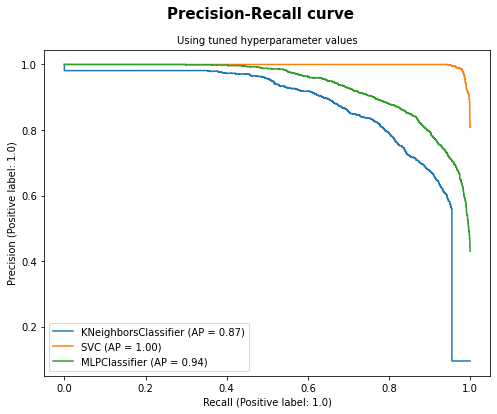

In [89]:
#optimized classifier
figure = plt.figure(figsize=(8,6))

for cls in classifiers:
  plot_precision_recall_curve(cls, X_test, y_test, ax = plt.gca(), name = cls.__class__.__name__)

plt.suptitle('Precision-Recall curve',  fontweight='bold', fontsize=15)
plt.title('Using tuned hyperparameter values', fontsize=10)
plt.legend(prop={'size':10}, loc='lower left')

## **Summary**

In [96]:
#for each model
from sklearn.metrics import classification_report
opt_knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean', weights = 'distance')
opt_knn = opt_knn.fit(X_train, y_train)
yproba = opt_knn.predict(X_test)
precision = precision_score(y_test, yproba)
recall = recall_score (y_test, yproba)
f1 = f1_score(y_test, yproba)
test_mse = mean_squared_error(y_test,yproba)
xproba = model.predict(X_train)
train_mse = mean_squared_error(y_train,xproba)

# evaluate the model
print('Recall-Score: %.5f' % recall)
print('Precision-Score: %.5f'% precision)
print('F-Score: %.5f' % f1)
print('Test MSE: %.5f' % test_mse)
print('Train MSE: %.5f' % train_mse)
print(classification_report(y_test, yproba))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Recall-Score: 0.70737
Precision-Score: 0.84973
F-Score: 0.77204
Test MSE: 0.03991
Train MSE: 0.10045
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     25428
         1.0       0.85      0.71      0.77      2686

    accuracy                           0.96     28114
   macro avg       0.91      0.85      0.88     28114
weighted avg       0.96      0.96      0.96     28114



In [97]:
from sklearn import svm
opt_svm = svm.SVC(kernel = 'linear', C= 1, random_state=random_state, probability=True)
opt_svm = opt_svm.fit(X_train, y_train)
yproba = opt_svm.predict(X_test)
precision = average_precision_score(y_test, yproba)
recall = recall_score (y_test, yproba)
f1 = f1_score(y_test, yproba)
test_mse = mean_squared_error(y_test,yproba)
xproba = model.predict(X_train)
train_mse = mean_squared_error(y_train,xproba)

# evaluate the model
print('Recall-Score: %.5f' % recall)
print('Precision-Score: %.5f'% precision)
print('F-Score: %.5f' % f1)
print('Test MSE: %.5f' % test_mse)
print('Train MSE: %.5f' % train_mse)
print(classification_report(y_test, yproba))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall-Score: 0.98064
Precision-Score: 0.96566
F-Score: 0.98174
Test MSE: 0.00349
Train MSE: 0.10045
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25428
         1.0       0.98      0.98      0.98      2686

    accuracy                           1.00     28114
   macro avg       0.99      0.99      0.99     28114
weighted avg       1.00      1.00      1.00     28114



In [98]:

opt_ann = MLPClassifier(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (300, 200, 300, 100), max_iter = 300)
opt_ann = opt_ann.fit(X_train, y_train)
yproba = opt_ann.predict(X_test)
precision = precision_score(y_test, yproba)
recall = recall_score (y_test, yproba)
f1 = f1_score(y_test, yproba)
test_mse = mean_squared_error(y_test,yproba)
xproba = model.predict(X_train)
train_mse = mean_squared_error(y_train,xproba)

# evaluate the model
print('Recall-Score: %.5f' % recall)
print('Precision-Score: %.5f'% precision)
print('F-Score: %.5f' % f1)
print('Test MSE: %.5f' % test_mse)
print('Train MSE: %.5f' % train_mse)
print(classification_report(y_test, yproba))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall-Score: 0.99851
Precision-Score: 0.90364
F-Score: 0.94871
Test MSE: 0.01032
Train MSE: 0.10045
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     25428
         1.0       0.90      1.00      0.95      2686

    accuracy                           0.99     28114
   macro avg       0.95      0.99      0.97     28114
weighted avg       0.99      0.99      0.99     28114

